In [61]:
import subprocess

subprocess.run(['python', '../demo.py', '-learn_task_distribution', 'True', '-m1', 'True', '-m2', 'True'])


Number of tasks: 80
Task frequency 0.2
TIME 15: {(18, 15): 0.5, (16, 19): 0.5}
TIME 30: {(18, 15): 0.16666666666666666, (16, 19): 0.16666666666666666, (14, 9): 0.16666666666666666, (6, 23): 0.16666666666666666, (4, 11): 0.16666666666666666, (14, 35): 0.16666666666666666}
TIME 45: {(18, 15): 0.1, (16, 19): 0.1, (14, 9): 0.1, (6, 23): 0.1, (4, 11): 0.1, (14, 35): 0.1, (14, 27): 0.1, (16, 17): 0.1, (4, 15): 0.1, (20, 3): 0.1}
TIME 60: {(18, 15): 0.07142857142857142, (16, 19): 0.07142857142857142, (14, 9): 0.07142857142857142, (6, 23): 0.07142857142857142, (4, 11): 0.07142857142857142, (14, 35): 0.07142857142857142, (14, 27): 0.07142857142857142, (16, 17): 0.07142857142857142, (4, 15): 0.07142857142857142, (20, 3): 0.07142857142857142, (6, 1): 0.07142857142857142, (6, 7): 0.07142857142857142, (10, 9): 0.07142857142857142, (18, 3): 0.07142857142857142}
TIME 75: {(18, 15): 0.0625, (16, 19): 0.0625, (14, 9): 0.0625, (6, 23): 0.125, (4, 11): 0.0625, (14, 35): 0.0625, (14, 27): 0.0625, (16, 17)

CompletedProcess(args=['python', '../demo.py', '-learn_task_distribution', 'True', '-m1', 'True', '-m2', 'True'], returncode=0)

In [62]:
import matplotlib.pyplot as plt
import yaml
import numpy as np
import pandas as pd

%matplotlib inline

with open('stats_with_learning.yaml', 'r') as f:
    df = pd.json_normalize(yaml.safe_load(f))
    
    costs = df.costs[0]
    makespans = df.makespans[0]
    serv_times = df.serv_times[0]
    runtimes = df.runtimes[0]
    

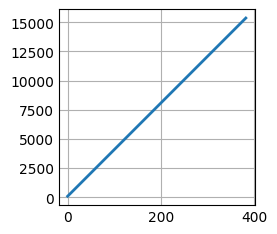

In [63]:
plt.style.use('_mpl-gallery')

x = np.arange(0, len(costs))

# plot
fig, ax = plt.subplots()

ax.plot(x, costs, linewidth=2.0)

plt.show()


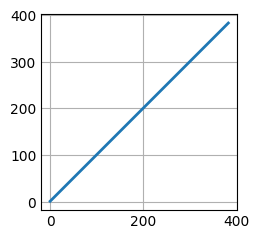

In [64]:
x = np.arange(0, len(makespans))

# plot
fig, ax = plt.subplots()

ax.plot(x, makespans, linewidth=2.0)

plt.show()

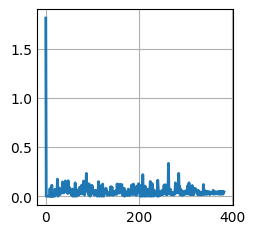

In [65]:
x = np.arange(0, len(runtimes))

# plot
fig, ax = plt.subplots()

ax.plot(x, runtimes, linewidth=2.0)

plt.show()

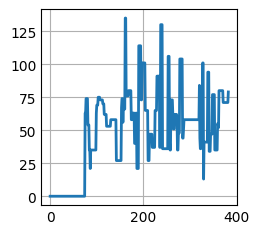

In [66]:
x = np.arange(0, len(serv_times))

# plot
fig, ax = plt.subplots()

ax.plot(x, serv_times, linewidth=2.0)

plt.show()